In [9]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
RESOURCE_PATH = os.path.join('../','resources')
FILM_PATH = os.path.join(RESOURCE_PATH, 'data', 'split_film_data')
RATINGS_PATH = os.path.join(RESOURCE_PATH, 'data', 'split_film_data')
csv_files = [
    'film_data_part1.csv',
    'film_data_part2.csv',
    'film_data_part3.csv',
    'film_data_part4.csv'
]


In [11]:
film_data_frames = [pd.read_csv(os.path.join(FILM_PATH, file)) for file in csv_files]
film_data = pd.concat(film_data_frames, ignore_index=True)
print(film_data.describe())
print(film_data.info())

                fid   ratingCount  ratingValue      duration
count  9.815000e+03  9.815000e+03  9815.000000   9815.000000
mean   2.566169e+06  1.132586e+05     6.872410   5699.309221
std    4.047363e+06  1.887037e+05     1.075016   2424.497328
min    1.200000e+01  6.968000e+03     1.200000      0.000000
25%    1.124665e+05  2.690400e+04     6.200000   5340.000000
50%    7.874750e+05  5.032400e+04     6.900000   6120.000000
75%    3.014575e+06  1.151240e+05     7.600000   6960.000000
max    3.032115e+07  2.975583e+06    10.000000  28020.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9815 entries, 0 to 9814
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   fid            9815 non-null   int64  
 1   name           9815 non-null   object 
 2   description    9815 non-null   object 
 3   ratingCount    9815 non-null   int64  
 4   ratingValue    9815 non-null   float64
 5   contentRating  9739 non-null   

In [12]:
print(film_data.shape)
print(film_data.isnull().sum())
film_data.head() # 13 cols

(9815, 13)
fid                0
name               0
description        0
ratingCount        0
ratingValue        0
contentRating     76
genre              0
keywords           7
duration           0
datePublished      0
actor              9
director         975
image              0
dtype: int64


,fid,name,description,ratingCount,ratingValue,contentRating,genre,keywords,duration,datePublished,actor,director,image
0,468569,The Dark Knight,When a menace known as the Joker wreaks havoc ...,2956401,9.0,P,"Action,Crime,Drama","psychopath,superhero,moral dilemma,clown,crimi...",9120,2008-08-29,"Christian Bale,Heath Ledger,Aaron Eckhart",Christopher Nolan,https://m.media-amazon.com/images/M/MV5BMTMxNT...
1,1375666,Inception,A thief who steals corporate secrets through t...,2623493,8.8,P,"Action,Adventure,Sci-Fi","dream,ambiguous ending,subconscious,mindbender...",8880,2010-08-06,"Leonardo DiCaprio,Joseph Gordon-Levitt,Elliot ...",Christopher Nolan,https://m.media-amazon.com/images/M/MV5BMjAxMz...
2,111161,The Shawshank Redemption,A banker convicted of uxoricide forms a friend...,2975583,9.3,C16,Drama,"prison,based on the works of stephen king,esca...",8520,1994-10-14,"Tim Robbins,Morgan Freeman,Bob Gunton",Frank Darabont,https://m.media-amazon.com/images/M/MV5BMDAyY2...
3,133093,The Matrix,When a beautiful stranger leads computer hacke...,2111264,8.7,C16,"Action,Sci-Fi","artificial reality,simulated reality,dystopia,...",8160,1999-03-31,"Keanu Reeves,Laurence Fishburne,Carrie-Anne Moss","Lana Wachowski,Lilly Wachowski",https://m.media-amazon.com/images/M/MV5BZWEzNz...
4,110912,Pulp Fiction,"The lives of two mob hitmen, a boxer, a gangst...",2283888,8.9,R,"Crime,Drama","nonlinear timeline,overdose,drug use,drug over...",9240,1994-10-14,"John Travolta,Uma Thurman,Samuel L. Jackson",Quentin Tarantino,https://m.media-amazon.com/images/M/MV5BYTViYT...


In [13]:
genre_counts = film_data['genre'].str.split(',').explode().value_counts()
print(genre_counts)


genre
Drama          5335
Comedy         3294
Action         2630
Crime          2120
Adventure      2088
Thriller       1606
Horror         1388
Romance        1269
Mystery        1259
Fantasy         830
Sci-Fi          814
Animation       717
Biography       624
Family          477
History         310
Music           243
War             184
Sport           168
Documentary     156
Musical         110
Western         104
Short            88
Film-Noir        64
Talk-Show        12
Reality-TV       10
News              6
Game-Show         5
Name: count, dtype: int64


In [14]:
# Visualization
sns.set(style="whitegrid")


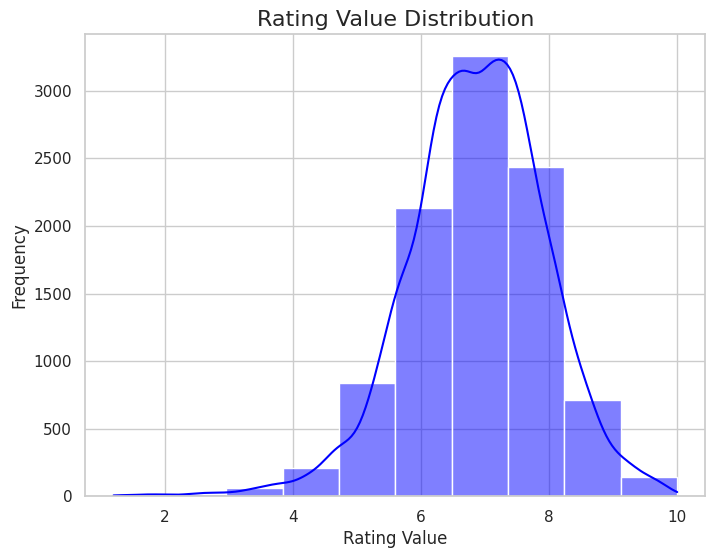

In [15]:
plt.figure(figsize=(8, 6))
sns.histplot(film_data['ratingValue'], kde=True, bins=10, color="blue")
plt.title("Rating Value Distribution", fontsize=16)
plt.xlabel("Rating Value", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.show()

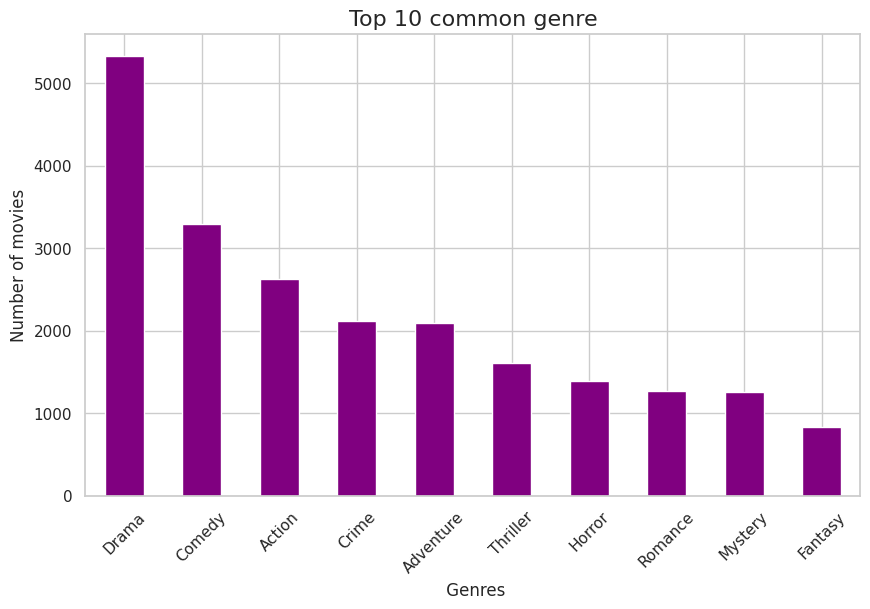

In [16]:
# Biểu đồ thanh tần suất các thể loại phim
genre_counts.head(10).plot(kind='bar', figsize=(10, 6), color='purple')
plt.title("Top 10 common genre", fontsize=16)
plt.xlabel(" Genres", fontsize=12)
plt.ylabel("Number of movies", fontsize=12)
plt.xticks(rotation=45)
plt.show()
